In [1]:
require(tidyverse)
library(dplyr)
library(ggplot2)
#library(psych) 
library(GGally)
options(warn=-1)
options(scipen=999)
#library(crosstable)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘GGally’ was built under R version 4.2.3”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
path <- "~/"


# in one pipeline:
rsquared_files_list  <- path %>% 
  
  # get csvs full paths. (?i) is for case insentitive
  list.files(pattern = "rsquared_.*\\.csv$", full.names = TRUE)


In [53]:
varimp_10_files_list  <- path %>% 
  
  # get csvs full paths. (?i) is for case insentitive
  list.files(pattern = "varimp_10000_.*\\.csv$", full.names = TRUE)

In [54]:
varimp_10_df<-Reduce(bind_rows,lapply(varimp_10_files_list,read.csv))

In [40]:
varimp_10_df[is.na(varimp_10_df)] <- 0
statistics_varimp_df<-varimp_10_df %>% select(-features) %>% group_by(corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff) %>% 
summarise_all(mean)
head(statistics_varimp_df)

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,⋯,sim_cpf_0.1820,sim_cpf_100.1820,sim_cpf_25.1820,sim_cpf_50.1820,sim_cpf_75.1820,sim_cpf_beta.1820,sim_with_head.1820,sim_with_modifier.1820,sim_bw_settings_comp.1820,sim_bw_settings_comp.1840
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,⋯,0,0,0,0,0,0,0,0,0,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,10,⋯,0,0,0,0,0,0,0,0,0,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,50,⋯,0,0,0,0,0,0,0,0,0,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,100,⋯,0,0,0,0,0,0,0,0,0,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,500,⋯,0,0,0,0,0,0,0,0,0,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,1000,⋯,0,0,0,0,0,0,0,0,0,0


In [41]:
statistics_varimp_pivoted_df<-statistics_varimp_df %>% select(!c(n,seed,ml_algo)) %>%
  pivot_longer(!c('corpus','tag','ppmi','setting','timespan','cutoff','impute','dataset','pattern','y'), names_to = "feature_time", values_to = "value")

head(statistics_varimp_pivoted_df)

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,feature_time,value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1900,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1910,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1920,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1930,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1940,0
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1950,0


In [42]:
statistics_varimp_pivoted_df<-statistics_varimp_pivoted_df %>% separate(col=feature_time,into=c('feature', 'time'), sep='\\.',remove=FALSE)


In [43]:
cordeiro_cols<-c('arith_mean_sim.','beta.','geom_mean_sim.','sim_cpf_0.','sim_cpf_100.','sim_cpf_25.','sim_cpf_50.','sim_cpf_75.','sim_cpf_beta.')
cosine_sim_cols<-c("sim_bw_constituents.",'sim_with_head.','sim_with_modifier.')

with_setting_cols<-c("sim_bw_settings_comp.","sim_bw_settings_head.","sim_bw_settings_modifier.")
info_theory_cols<-c("local_mi.","log_ratio.","ppmi.")
freq_cols<-c("comp_freq.","comp_tf.","head_freq.","head_tf.","log_comp_freq.","log_head_freq.","log_head_freq_new.","log_mod_freq.","log_mod_freq_new.","mod_freq.","mod_tf.")
prod_cols<-c("head_family_size.","head_family_size_new.","head_prod.","mod_family_size.","mod_family_size_new.","mod_prod.")

In [44]:
statistics_varimp_pivoted_df$feature<-paste0(statistics_varimp_pivoted_df$feature,".")

In [45]:
statistics_varimp_pivoted_df$feature_class<-""
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  cordeiro_cols] <- "cordeiro"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  cosine_sim_cols] <- "cosine_sim"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  with_setting_cols] <- "with_setting"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  info_theory_cols] <- "info_theory"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  freq_cols] <- "freq"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  prod_cols] <- "prod"
statistics_varimp_pivoted_df

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,feature_time,feature,time,value,feature_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1900,arith_mean_sim.,1900,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1910,arith_mean_sim.,1910,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1920,arith_mean_sim.,1920,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1930,arith_mean_sim.,1930,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1940,arith_mean_sim.,1940,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1950,arith_mean_sim.,1950,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1960,arith_mean_sim.,1960,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1970,arith_mean_sim.,1970,0.0000000,cordeiro
coha,Tagged,RAW,Agnostic,med,cordeiro100,compound,all,10,0,arith_mean_sim.1980,arith_mean_sim.,1980,0.0000000,cordeiro


In [51]:
statistics_varimp_pivoted_df %>% filter(dataset=="cordeiro90") %>% group_by(feature_class,y) %>% summarize(mean(value))

`summarise()` has grouped output by 'feature_class'. You can override using the `.groups` argument.


feature_class,y,mean(value)
<chr>,<chr>,<dbl>
cordeiro,compound,6.510543
cordeiro,head,6.317596
cordeiro,modifier,6.406729
cosine_sim,compound,9.446290
cosine_sim,head,8.424415
cosine_sim,modifier,8.028148
freq,compound,5.468501
freq,head,5.667107
freq,modifier,4.139813


In [49]:
statistics_varimp_pivoted_df %>% group_by(feature) %>% summarize(mv=mean(value))  %>% arrange(desc(mv))


feature,mv
<chr>,<dbl>
sim_bw_settings_head.,12.463138
sim_bw_settings_modifier.,9.992618
sim_bw_constituents.,9.248982
sim_bw_settings_comp.,7.506390
sim_with_head.,6.767118
geom_mean_sim.,6.577389
arith_mean_sim.,6.128477
sim_cpf_0.,5.958613
sim_with_modifier.,5.950129


In [50]:
statistics_varimp_pivoted_df %>% group_by(time) %>% summarize(mv=mean(value))  %>% arrange(desc(mv))


time,mv
<chr>,<dbl>
2010,8.196755
2000,7.245247
1990,6.813757
1980,6.282004
1970,5.828593
1960,5.409751
1940,5.075588
1950,5.056506
1930,4.836836


In [15]:
rsquared_df<-Reduce(rbind,lapply(rsquared_files_list,read.csv))

In [17]:
rsquared_df %>% dim()

[1] 87100    17

In [25]:
rsquared_df$cutoff<-as.factor(rsquared_df$cutoff)
statistics<-rsquared_df %>% group_by(corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff) %>% 
summarise(n=mean(n),meanRsquared=mean(TrainRsquared),sdRsquared=sd(TrainRsquared),meanCorr=mean(TrainSpearman),sdCorr=sd(TrainSpearman))

statistics  %>% filter(tag=="UnTagged" & y =="compound" ) %>% arrange(desc(meanCorr)) %>% head(10)

`summarise()` has grouped output by 'corpus', 'tag', 'ppmi', 'setting', 'impute', 'dataset', 'y', 'pattern', 'timespan'. You can override using the `.groups` argument.


corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
google,UnTagged,RAW,Agnostic,na,reddy,compound,all,10,100,90,0.6907913,0.02401532,0.8001235,0.03282624
coha,UnTagged,PPMI,Aware,na,reddy,compound,all,10,1000,65,0.5736739,0.03679765,0.7837430,0.08824441
google,UnTagged,RAW,Agnostic,med,reddy,compound,all,10,100,90,0.6449692,0.01674667,0.7652046,0.02203422
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10,10,90,0.5799908,0.02390836,0.7631465,0.07853166
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10000,1000,90,0.5890623,0.02221563,0.7575945,0.04531257
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10000,0,90,0.6088138,0.02019557,0.7569681,0.03883739
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10000,10,90,0.6088164,0.02019435,0.7569681,0.03883739
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10000,500,90,0.5917275,0.02217936,0.7567562,0.04504203
google,UnTagged,PPMI,Agnostic,na,reddy,compound,all,10000,50,90,0.6086912,0.02017613,0.7563402,0.03818418


In [26]:
statistics  %>% filter(tag=="UnTagged" & y =="head") %>% arrange(desc(meanCorr)) %>% head(10)



corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
google,UnTagged,PPMI,Agnostic,med,reddy,head,all,10000,0,90,0.5683588,0.01665881,0.7632759,0.01466416
google,UnTagged,PPMI,Agnostic,med,reddy,head,all,10000,10,90,0.5683573,0.01665894,0.7632759,0.01466416
google,UnTagged,PPMI,Agnostic,med,reddy,head,all,10000,50,90,0.5676982,0.01692786,0.7628542,0.01481999
google,UnTagged,PPMI,Agnostic,med,reddy,head,all,10000,100,90,0.5665250,0.01776675,0.7610475,0.01465816
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,10000,50,90,0.5713738,0.01721994,0.7581480,0.01707084
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,10000,0,90,0.5713608,0.01715855,0.7580354,0.01642470
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,10000,10,90,0.5713619,0.01715600,0.7580354,0.01642470
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,10000,100,90,0.5711042,0.01765448,0.7578976,0.01648903
google,UnTagged,PPMI,Aware,med,reddy,head,all,10000,0,90,0.5380099,0.03097339,0.7559972,0.02383814


In [27]:
statistics  %>% filter(tag=="UnTagged" & y =="modifier" ) %>% arrange(desc(meanCorr)) %>% head(10)

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
coha,UnTagged,PPMI,Agnostic,na,reddy,modifier,all,10000,0,90,0.5422385,0.02485596,0.7177026,0.04327459
coha,UnTagged,PPMI,Agnostic,med,reddy,modifier,all,10000,0,90,0.5135701,0.02184727,0.6817501,0.02528562
google,UnTagged,PPMI,Aware,na,cordeiro100,modifier,all,10000,0,100,0.4906724,0.03295806,0.6798902,0.02461089
google,UnTagged,PPMI,Aware,na,cordeiro100,modifier,all,10000,10,100,0.4906049,0.03288138,0.6798902,0.02461089
google,UnTagged,PPMI,Aware,med,cordeiro100,modifier,all,10000,0,100,0.4914902,0.03925218,0.6764108,0.02325569
google,UnTagged,PPMI,Aware,med,cordeiro100,modifier,all,10000,10,100,0.4915195,0.03924095,0.6762442,0.02326980
google,UnTagged,PPMI,Agnostic,na,reddy,modifier,all,10,10,90,0.4581940,0.02974290,0.6722708,0.04735988
google,UnTagged,PPMI,Agnostic,med,cordeiro100,modifier,all,10000,0,100,0.4563317,0.03063559,0.6669450,0.02739860
google,UnTagged,PPMI,Agnostic,med,cordeiro100,modifier,all,10000,10,100,0.4563475,0.03060501,0.6669450,0.02739860


In [19]:
summary(aov(meanCorr~corpus, data = statistics))

              Df Sum Sq Mean Sq F value              Pr(>F)    
corpus         1  57.69   57.69    3561 <0.0000000000000002 ***
Residuals   8708 141.06    0.02                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [20]:
statistics$corpus<-as.factor(statistics$corpus)

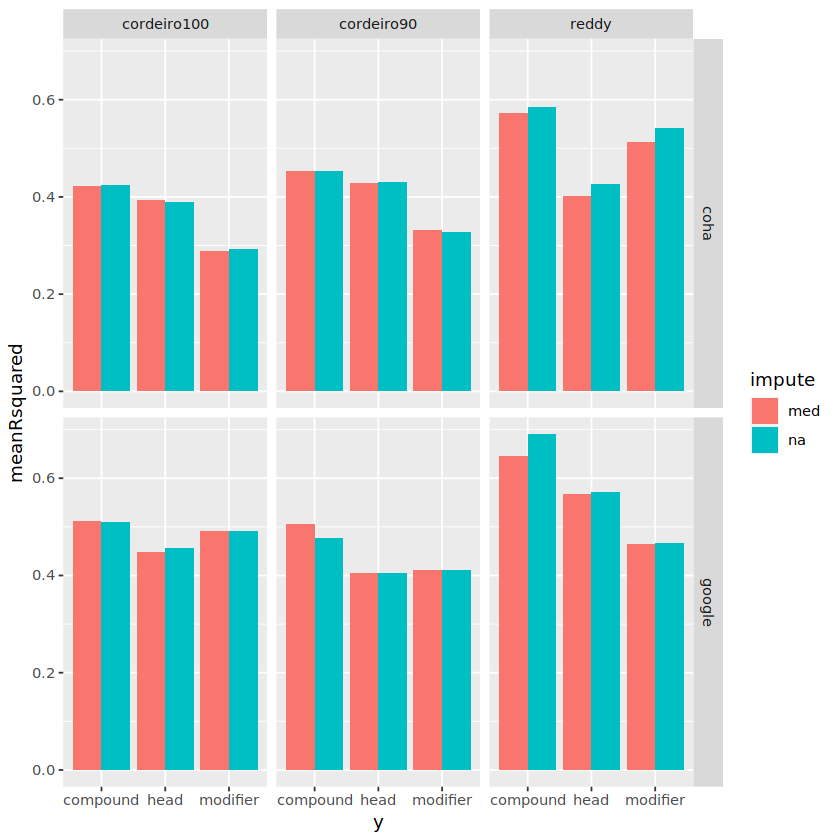

In [36]:
statistics %>% filter(tag=="UnTagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=impute)) + facet_grid(corpus~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

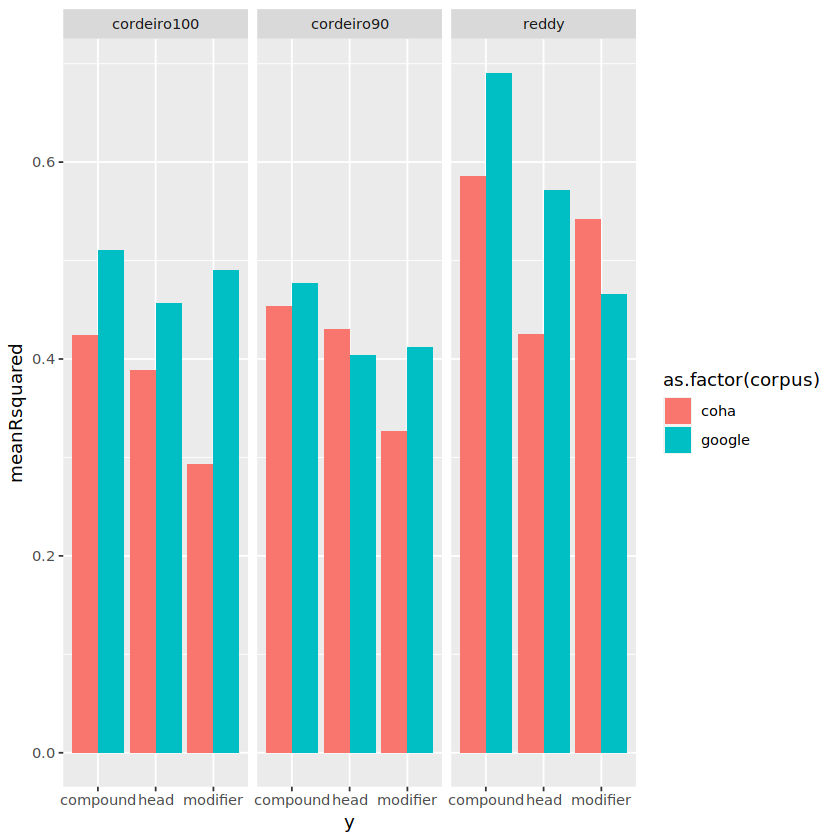

In [56]:
statistics %>% filter(impute=="na" & tag=="UnTagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=as.factor(corpus))) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

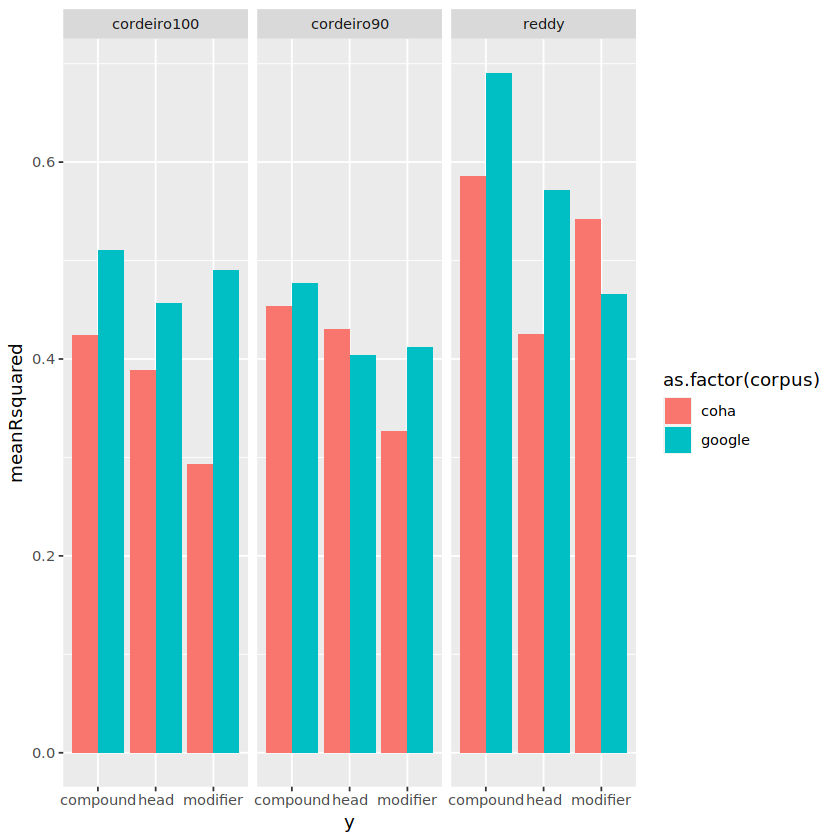

In [34]:
statistics %>% filter(impute=="na" & tag=="UnTagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=as.factor(corpus))) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

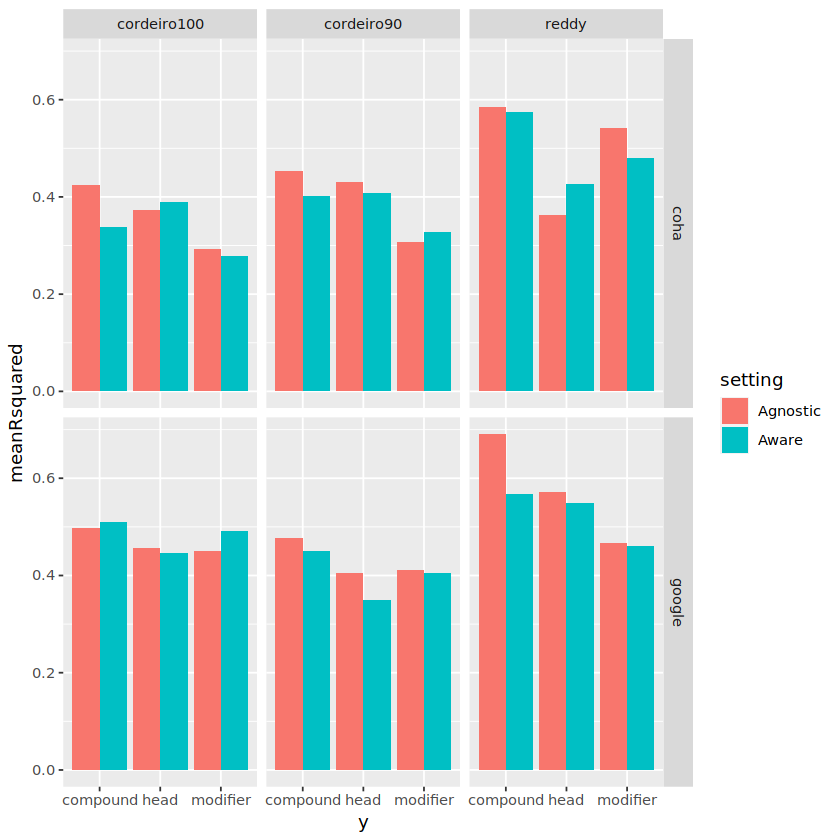

In [57]:
statistics %>% filter(impute=="na" & tag=="UnTagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=setting)) + facet_grid(corpus~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

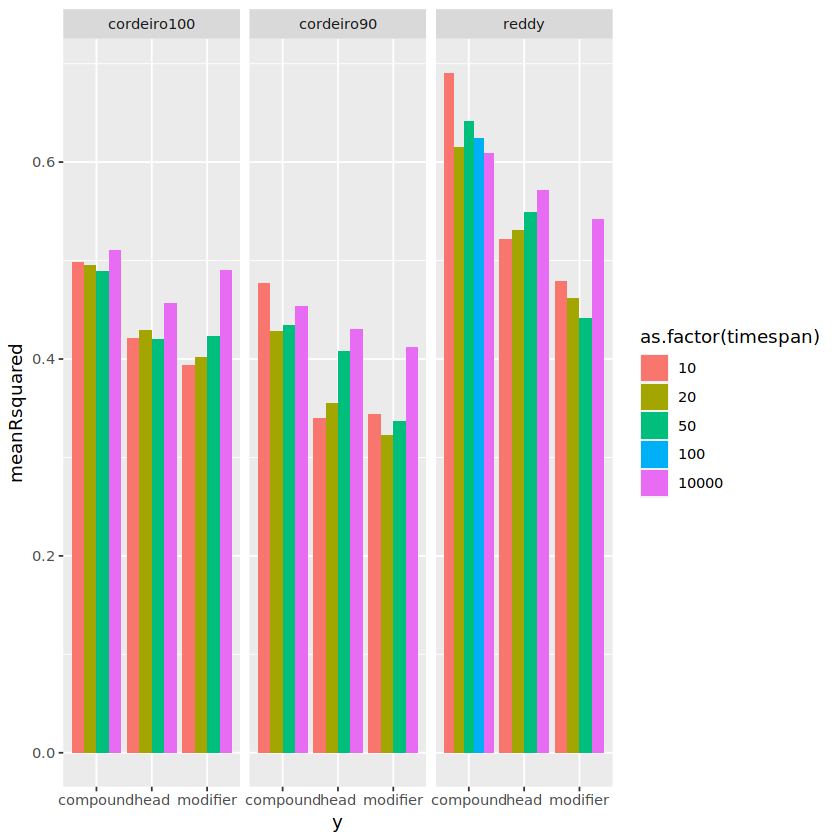

In [31]:
statistics %>% filter(impute=="na" & tag=="UnTagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=as.factor(timespan))) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()